.pandas is a software library written for the Python programming language for data manipulation and analysis.
.NumPymis a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
.Matplotlib is a plotting library for Python. It is used along with NumPy to provide an environment that is an effective open source alternative for MatLab.
.matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.
.Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

In [10]:
import pandas as pd
import numpy  as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('seaborn')


# Problem definition

# preparing data

In [11]:
total_data=pd.read_csv("../../data/Processed/New York_Weather_cyclical_taxi.csv", parse_dates=['datetime'])
total_data.sample(5)

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides,date,hour,month,day,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
8691,2015-12-29 03:00:00,1.596546,71.0,1032.0,6.0,69.0,43,2015-12-29,3,12,29,2015,0.730836,0.682553,0.478734,0.877960,-2.449294e-16,1.000000e+00
2410,2015-04-11 10:00:00,8.730667,69.0,1025.0,3.0,272.0,37,2015-04-11,10,4,11,2015,0.398401,-0.917211,0.188227,0.982126,8.660254e-01,-5.000000e-01
5309,2015-08-10 05:00:00,20.090000,88.0,1018.0,2.0,159.0,36,2015-08-10,5,8,10,2015,0.979084,0.203456,0.171293,0.985220,-8.660254e-01,-5.000000e-01
1509,2015-03-04 21:00:00,6.500000,81.0,1012.0,4.0,220.0,38,2015-03-04,21,3,4,2015,-0.519584,0.854419,0.068802,0.997630,1.000000e+00,6.123234e-17
2242,2015-04-04 10:00:00,11.114000,90.0,1014.0,5.0,260.0,38,2015-04-04,10,4,4,2015,0.398401,-0.917211,0.068802,0.997630,8.660254e-01,-5.000000e-01


For each city we have timeseries in a column. We are going to chose New York as our chosen city and  our chosen features. 

In [14]:
#data_city=branch[branch.cit'y=='london'] 
total_data=total_data[total_data.year==2015]

In [15]:
total_data[33:52]

,datetime,temperature,humidity,pressure,wind_speed,wind_direction,rides,date,hour,month,day,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
33,2015-01-02 09:00:00,-0.745000,62.0,1016.0,3.0,261.0,41,2015-01-02,9,1,2,2015,6.310879e-01,-0.775711,0.034422,0.999407,0.5,0.866025
34,2015-01-02 10:00:00,-0.745000,62.0,1016.0,3.0,261.0,41,2015-01-02,10,1,2,2015,3.984011e-01,-0.917211,0.034422,0.999407,0.5,0.866025
35,2015-01-02 11:00:00,-0.284075,69.0,1023.0,3.0,258.0,42,2015-01-02,11,1,2,2015,1.361666e-01,-0.990686,0.034422,0.999407,0.5,0.866025
36,2015-01-02 12:00:00,-1.355000,62.0,1019.0,3.0,254.0,41,2015-01-02,12,1,2,2015,-1.361666e-01,-0.990686,0.034422,0.999407,0.5,0.866025
37,2015-01-02 13:00:00,-0.646455,65.0,1022.0,3.0,254.0,41,2015-01-02,13,1,2,2015,-3.984011e-01,-0.917211,0.034422,0.999407,0.5,0.866025
38,2015-01-02 14:00:00,0.826273,71.0,1029.0,3.0,255.0,42,2015-01-02,14,1,2,2015,-6.310879e-01,-0.775711,0.034422,0.999407,0.5,0.866025
39,2015-01-02 15:00:00,1.081247,67.0,1026.0,3.0,259.0,41,2015-01-02,15,1,2,2015,-8.169699e-01,-0.576680,0.034422,0.999407,0.5,0.866025
40,2015-01-02 16:00:00,2.875000,76.0,1036.0,4.0,259.0,41,2015-01-02,16,1,2,2015,-9.422609e-01,-0.334880,0.034422,0.999407,0.5,0.866025
41,2015-01-02 17:00:00,3.451000,75.0,1036.0,4.0,263.0,40,2015-01-02,17,1,2,2015,-9.976688e-01,-0.068242,0.034422,0.999407,0.5,0.866025
42,2015-01-02 18:00:00,3.777000,57.0,1021.0,3.0,270.0,38,2015-01-02,18,1,2,2015,-9.790841e-01,0.203456,0.034422,0.999407,0.5,0.866025



# Visualization of the correlation between the features

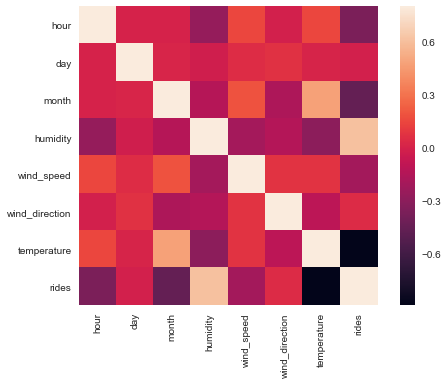

In [16]:
sample=total_data[['hour','day','month','humidity','wind_speed','wind_direction','temperature','rides']]
corrmat = sample.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Obviously we see negative correlation between temperature and taxi rides. It confirms that we need to analyze them in depth.
There is not signeficant correlation between independent variable so we can use them as a predictor.

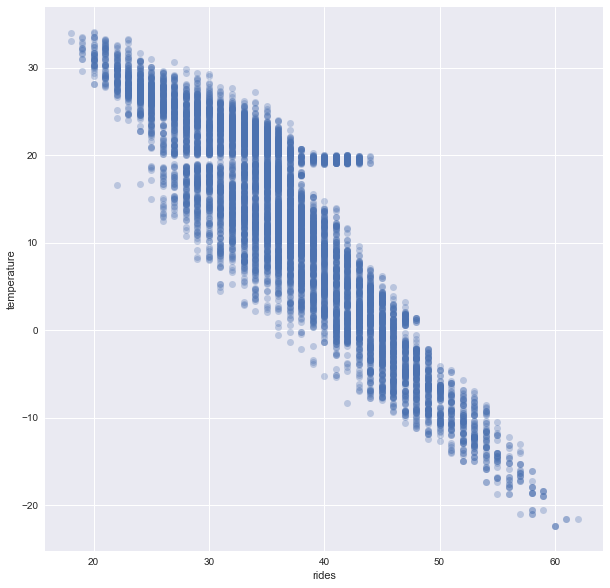

In [17]:


plt.figure(figsize=(10,10))
plt.ylabel('temperature')
plt.xlabel('rides')

plt.plot(total_data['rides'], total_data['temperature'], 'o', alpha=0.3)
plt.show()

In [18]:

plt.plot(total_data.date, total_data.temperature)
plt.ylabel('Temperature');


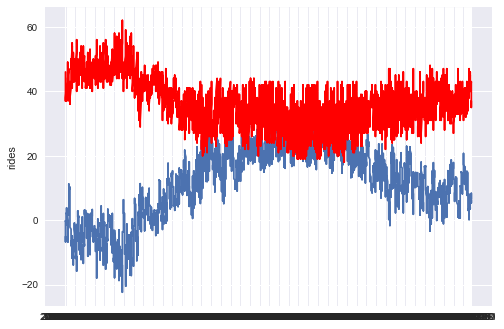

In [19]:
plt.plot(total_data.date, total_data.rides,'r')
plt.ylabel('rides');
plt.show()

# feature engineering 

In [20]:
def get_encode_feature(total_data):
        return total_data[['day_cos','hour_cos','hour_sin','day_sin','month_sin','month_cos','temperature']]

In [21]:
def get_unencoded_feature(total_data):
    return total_data[['month', 'day', 'hour']]

Let's split our data into training and test sets.

In [22]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(total_data, test_size=0.4)
data_test, data_val = train_test_split(data_test, test_size=0.5)

In [23]:
X_train=get_encode_feature(data_train)
X_test=get_encode_feature(data_test)
y_train=data_train.rides
y_test=data_test.rides
threshold = 0.8
X_columns=['hour_sin','hour_cos','day_sin','day_cos','month_sin','month_cos','temperature']
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)
print(X_columns)


X_train (5256, 7)
y_train (5256,)
X_test (1752, 7)
y_test (1752,)
['hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'temperature']


# Model Training / Evaluation with encoded feature

MODEL LinearRegression
MAE 2.22578560262
RMSE 2.85148491787


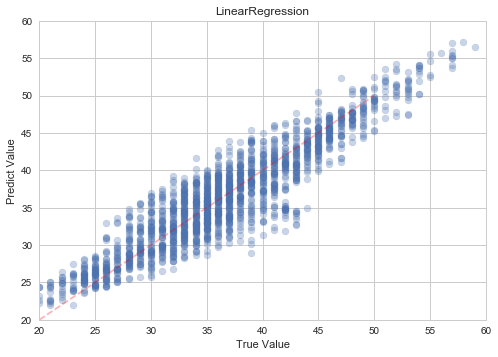

Feature Importance
             0         1
2      day_sin  2.258295
3      day_cos -0.469434
6  temperature -0.639724
4    month_sin -0.702087
0     hour_sin -0.773492

MODEL RandomForestRegressor10
MAE 1.45507990868
RMSE 1.9369587917


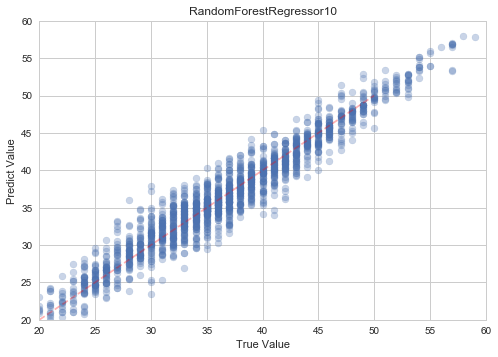

Feature Importance
             0         1
6  temperature  0.890360
2      day_sin  0.042989
1     hour_cos  0.018535
3      day_cos  0.014762
0     hour_sin  0.014655

MODEL RandomForestRegressor100
MAE 1.37523972603
RMSE 1.81837814735


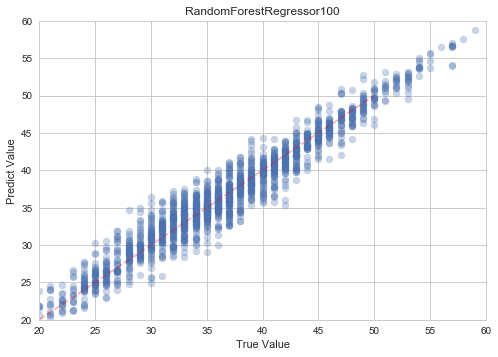

Feature Importance
             0         1
6  temperature  0.889628
2      day_sin  0.043680
1     hour_cos  0.017806
0     hour_sin  0.014878
3      day_cos  0.014850



,model,mae,rmse
2,RandomForestRegressor100,1.375240,1.818378
1,RandomForestRegressor10,1.455080,1.936959
0,LinearRegression,2.225786,2.851485


In [24]:
# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


sns.set_style('whitegrid')

models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(20,60, 10), range(20,60, 10), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([20, 60])
    plt.ylim([20, 60])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

# Model Training / Evaluation with encoded feature

In [25]:
X_train=get_unencoded_feature(data_train)
X_test=get_unencoded_feature(data_test)
y_train=data_train.rides
y_test=data_test.rides
threshold = 0.8
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (5256, 3)
y_train (5256,)
X_test (1752, 3)
y_test (1752,)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
#model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
print('MAE', mean_absolute_error(y_test, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE 5.09368022043
RMSE 6.14769912486


MODEL LinearRegression - encoded feature
MAE 2.30558745190091
RMSE 2.9557718061243214

MODEL LinearRegression - unencoded feature
MAE 5.322087434266247
RMSE 6.357275189694565

We achieved an improvement of 53% in our MSE
